# Analysis BER Marathon

## Import 

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

### Marathon data


In [ ]:
df = pd.read_csv('../data/raw/marathon.csv')

/var/folders/j5/dfd6by1n76zcvbvtsc72fsfc0000gn/T/ipykernel_63738/2307195851.py:1: DtypeWarning: Columns (26,27,28,29,31,32,34,35,37,38,40,41,43,44,46,47,49,50,52,53,54,56,57,59,60,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/marathon.csv')


In [ ]:
df

,Unnamed: 0,id,platz,startnummer,name,nachname,vorname,verein,nation,ak,...,z42,z42rr,z42platz,z42pace,hm1rr,hm1platz,hm1pace,hm2rr,hm2platz,hm2pace
0,0,163,25505,F3671,"Imane, Meknassi",Imane,Meknassi,NaN,FRA,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,165,31168,18941,"Mehnert, Heiko",Mehnert,Heiko,Thebobcurtizmovement,DEU,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,166,15421,17952,"Lujic, Miroslav",Lujic,Miroslav,NaN,SVN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,167,10092,13238,"Holst Rasmussen, Allan",Holst Rasmussen,Allan,NaN,DNK,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,168,6155,8162,"Dölling, Steffen",Dölling,Steffen,SV Rotation Halle e.V.,DEU,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484229,484229,54222,54164,51331,"Astra, Doddy",Astra,Doddy,NaN,INA,60,...,00:00:00,00:21:56,35525.0,00:10:00,00:00:00,35661.0,00:09:24,04:40:07,35422.0,00:13:17
484230,484230,54223,54165,63243,"Hart, Thomas",Hart,Thomas,Richmond Rockets,USA,75,...,00:00:00,00:25:13,35526.0,00:11:30,00:00:00,35612.0,00:09:06,04:47:16,35424.0,00:13:37
484231,484231,54224,54166,777,"Descombes, Michel",Descombes,Michel,Superman-Michel,FRA,80,...,00:00:00,00:00:00,35527.0,00:00:00,00:00:00,0.0,00:00:00,00:00:00,0.0,00:00:00
484232,484232,54225,54167,85148,"Trenkmann, Richard",Trenkmann,Richard,NaN,USA,80,...,00:00:00,00:00:00,35528.0,00:00:00,00:00:00,35719.0,00:11:40,04:41:05,35423.0,00:13:20


In [ ]:
df.shape

(484234, 63)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484234 entries, 0 to 484233
Data columns (total 63 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    484234 non-null  int64  
 1   id            484234 non-null  int64  
 2   platz         484234 non-null  int64  
 3   startnummer   484229 non-null  object 
 4   name          484234 non-null  object 
 5   nachname      484234 non-null  object 
 6   vorname       484226 non-null  object 
 7   verein        194247 non-null  object 
 8   nation        484226 non-null  object 
 9   ak            484123 non-null  object 
 10  ak_platz      484234 non-null  int64  
 11  sex           484231 non-null  object 
 12  sex_platz     484234 non-null  int64  
 13  z5            484234 non-null  object 
 14  z10           484234 non-null  object 
 15  z15           484234 non-null  object 
 16  z20           484234 non-null  object 
 17  z25           484234 non-null  object 
 18  z30 

In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'platz', 'startnummer', 'name', 'nachname',
       'vorname', 'verein', 'nation', 'ak', 'ak_platz', 'sex', 'sex_platz',
       'z5', 'z10', 'z15', 'z20', 'z25', 'z30', 'z35', 'z40', 'halbmarathon',
       'netto', 'brutto', 'ident', 'year', 'event', 'description', 'z38',
       'z5rr', 'z5platz', 'z5pace', 'z10rr', 'z10platz', 'z10pace', 'z15rr',
       'z15platz', 'z15pace', 'z20rr', 'z20platz', 'z20pace', 'z25rr',
       'z25platz', 'z25pace', 'z30rr', 'z30platz', 'z30pace', 'z35rr',
       'z35platz', 'z35pace', 'z40rr', 'z40platz', 'z40pace', 'z42', 'z42rr',
       'z42platz', 'z42pace', 'hm1rr', 'hm1platz', 'hm1pace', 'hm2rr',
       'hm2platz', 'hm2pace'],
      dtype='object')

In [ ]:
df['ak'].unique()

array(['40', '45', '30', '60', 'H', '35', '55', '50', '65', '70', '75',
       'JA', '80', nan, 'U20', '85', 'Jug', 'JU20'], dtype=object)

#### Weather data

In [ ]:
df_weather = pd.read_csv("../data/processed/weather.csv")

In [ ]:
df_weather.head()

,Unnamed: 0,MESS_DATUM,TMK
0,23278,20110925,15.3
1,23649,20120930,12.0
2,24013,20130929,9.0
3,24377,20140928,14.0
4,24741,20150927,11.4


In [ ]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  13 non-null     int64  
 1   MESS_DATUM  13 non-null     int64  
 2   TMK         13 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 444.0 bytes


In [ ]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  13 non-null     int64  
 1   MESS_DATUM  13 non-null     int64  
 2   TMK         13 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 444.0 bytes


## Data Cleaning

### Marathon data

In [ ]:
df.drop(['Unnamed: 0', 'ident', 'event','description', 'z38',
       'z5rr', 'z5platz', 'z5pace', 'z10rr', 'z10platz', 'z10pace', 'z15rr',
       'z15platz', 'z15pace', 'z20rr', 'z20platz', 'z20pace', 'z25rr',
       'z25platz', 'z25pace', 'z30rr', 'z30platz', 'z30pace', 'z35rr',
       'z35platz', 'z35pace', 'z40rr', 'z40platz', 'z40pace', 'z42', 'z42rr',
       'z42platz', 'z42pace', 'hm1rr', 'hm1platz', 'hm1pace', 'hm2rr',
       'hm2platz', 'hm2pace'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484234 entries, 0 to 484233
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            484234 non-null  int64 
 1   platz         484234 non-null  int64 
 2   startnummer   484229 non-null  object
 3   name          484234 non-null  object
 4   nachname      484234 non-null  object
 5   vorname       484226 non-null  object
 6   verein        194247 non-null  object
 7   nation        484226 non-null  object
 8   ak            484123 non-null  object
 9   ak_platz      484234 non-null  int64 
 10  sex           484231 non-null  object
 11  sex_platz     484234 non-null  int64 
 12  z5            484234 non-null  object
 13  z10           484234 non-null  object
 14  z15           484234 non-null  object
 15  z20           484234 non-null  object
 16  z25           484234 non-null  object
 17  z30           484234 non-null  object
 18  z35           484234 non

In [ ]:
df['z5'] = pd.to_timedelta(df['z5'])
df['z10'] = pd.to_timedelta(df['z10'])
df['z15'] = pd.to_timedelta(df['z15'])
df['z20'] = pd.to_timedelta(df['z20'])
df['z25'] = pd.to_timedelta(df['z25'])
df['z30'] = pd.to_timedelta(df['z30'])
df['z35'] = pd.to_timedelta(df['z35'])
df['z40'] = pd.to_timedelta(df['z40'])
df['halbmarathon'] = pd.to_timedelta(df['halbmarathon'])
df['netto'] = pd.to_timedelta(df['netto'])
df['brutto'] = pd.to_timedelta(df['brutto'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484234 entries, 0 to 484233
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype          
---  ------        --------------   -----          
 0   id            484234 non-null  int64          
 1   platz         484234 non-null  int64          
 2   startnummer   484229 non-null  object         
 3   name          484234 non-null  object         
 4   nachname      484234 non-null  object         
 5   vorname       484226 non-null  object         
 6   verein        194247 non-null  object         
 7   nation        484226 non-null  object         
 8   ak            484123 non-null  object         
 9   ak_platz      484234 non-null  int64          
 10  sex           484231 non-null  object         
 11  sex_platz     484234 non-null  int64          
 12  z5            484234 non-null  timedelta64[ns]
 13  z10           484234 non-null  timedelta64[ns]
 14  z15           484234 non-null  timedelta64[ns]
 15  

In [ ]:
df

,id,platz,startnummer,name,nachname,vorname,verein,nation,ak,ak_platz,...,z15,z20,z25,z30,z35,z40,halbmarathon,netto,brutto,year
0,163,25505,F3671,"Imane, Meknassi",Imane,Meknassi,NaN,FRA,40,967,...,0 days 01:30:05,0 days 02:02:11,0 days 02:35:02,0 days 03:10:02,0 days 00:00:00,0 days 04:24:49,0 days 02:08:42,0 days 04:40:42,0 days 04:51:25,2011
1,165,31168,18941,"Mehnert, Heiko",Mehnert,Heiko,Thebobcurtizmovement,DEU,45,4685,...,0 days 01:39:16,0 days 02:13:46,0 days 02:52:33,0 days 03:36:21,0 days 04:20:49,0 days 05:07:56,0 days 02:21:08,0 days 05:25:47,0 days 05:50:09,2011
2,166,15421,17952,"Lujic, Miroslav",Lujic,Miroslav,NaN,SVN,45,2656,...,0 days 01:28:53,0 days 01:56:40,0 days 02:24:31,0 days 02:52:51,0 days 03:21:17,0 days 03:50:26,0 days 02:02:52,0 days 04:01:35,0 days 04:27:39,2011
3,167,10092,13238,"Holst Rasmussen, Allan",Holst Rasmussen,Allan,NaN,DNK,30,1249,...,0 days 01:16:44,0 days 01:40:45,0 days 02:05:30,0 days 02:32:49,0 days 02:59:53,0 days 03:30:44,0 days 01:45:59,0 days 03:46:46,0 days 03:51:41,2011
4,168,6155,8162,"Dölling, Steffen",Dölling,Steffen,SV Rotation Halle e.V.,DEU,30,845,...,0 days 01:16:44,0 days 01:41:42,0 days 02:07:11,0 days 02:31:48,0 days 02:56:28,0 days 03:21:12,0 days 01:47:34,0 days 03:31:48,0 days 03:35:11,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484229,54222,54164,51331,"Astra, Doddy",Astra,Doddy,NaN,INA,60,1865,...,0 days 02:14:26,0 days 03:06:24,0 days 04:08:28,0 days 05:10:34,0 days 06:48:49,0 days 07:36:13,0 days 03:18:03,0 days 07:58:09,0 days 08:16:45,2024
484230,54223,54165,63243,"Hart, Thomas",Hart,Thomas,Richmond Rockets,USA,75,77,...,0 days 02:08:46,0 days 02:59:16,0 days 04:03:24,0 days 05:08:29,0 days 06:19:38,0 days 07:33:42,0 days 03:11:39,0 days 07:58:55,0 days 08:10:30,2024
484231,54224,54166,777,"Descombes, Michel",Descombes,Michel,Superman-Michel,FRA,80,18,...,0 days 00:00:00,0 days 00:00:00,0 days 04:49:12,0 days 05:49:08,0 days 06:09:23,0 days 00:00:00,0 days 00:00:00,0 days 08:09:01,0 days 08:28:36,2024
484232,54225,54167,85148,"Trenkmann, Richard",Trenkmann,Richard,NaN,USA,80,19,...,0 days 02:51:48,0 days 03:53:10,0 days 04:55:32,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 04:05:59,0 days 08:47:03,0 days 09:03:49,2024


In [ ]:
df = df[df['netto'] != "0 days 00:00:00"]
df

,id,platz,startnummer,name,nachname,vorname,verein,nation,ak,ak_platz,...,z15,z20,z25,z30,z35,z40,halbmarathon,netto,brutto,year
0,163,25505,F3671,"Imane, Meknassi",Imane,Meknassi,NaN,FRA,40,967,...,0 days 01:30:05,0 days 02:02:11,0 days 02:35:02,0 days 03:10:02,0 days 00:00:00,0 days 04:24:49,0 days 02:08:42,0 days 04:40:42,0 days 04:51:25,2011
1,165,31168,18941,"Mehnert, Heiko",Mehnert,Heiko,Thebobcurtizmovement,DEU,45,4685,...,0 days 01:39:16,0 days 02:13:46,0 days 02:52:33,0 days 03:36:21,0 days 04:20:49,0 days 05:07:56,0 days 02:21:08,0 days 05:25:47,0 days 05:50:09,2011
2,166,15421,17952,"Lujic, Miroslav",Lujic,Miroslav,NaN,SVN,45,2656,...,0 days 01:28:53,0 days 01:56:40,0 days 02:24:31,0 days 02:52:51,0 days 03:21:17,0 days 03:50:26,0 days 02:02:52,0 days 04:01:35,0 days 04:27:39,2011
3,167,10092,13238,"Holst Rasmussen, Allan",Holst Rasmussen,Allan,NaN,DNK,30,1249,...,0 days 01:16:44,0 days 01:40:45,0 days 02:05:30,0 days 02:32:49,0 days 02:59:53,0 days 03:30:44,0 days 01:45:59,0 days 03:46:46,0 days 03:51:41,2011
4,168,6155,8162,"Dölling, Steffen",Dölling,Steffen,SV Rotation Halle e.V.,DEU,30,845,...,0 days 01:16:44,0 days 01:41:42,0 days 02:07:11,0 days 02:31:48,0 days 02:56:28,0 days 03:21:12,0 days 01:47:34,0 days 03:31:48,0 days 03:35:11,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484229,54222,54164,51331,"Astra, Doddy",Astra,Doddy,NaN,INA,60,1865,...,0 days 02:14:26,0 days 03:06:24,0 days 04:08:28,0 days 05:10:34,0 days 06:48:49,0 days 07:36:13,0 days 03:18:03,0 days 07:58:09,0 days 08:16:45,2024
484230,54223,54165,63243,"Hart, Thomas",Hart,Thomas,Richmond Rockets,USA,75,77,...,0 days 02:08:46,0 days 02:59:16,0 days 04:03:24,0 days 05:08:29,0 days 06:19:38,0 days 07:33:42,0 days 03:11:39,0 days 07:58:55,0 days 08:10:30,2024
484231,54224,54166,777,"Descombes, Michel",Descombes,Michel,Superman-Michel,FRA,80,18,...,0 days 00:00:00,0 days 00:00:00,0 days 04:49:12,0 days 05:49:08,0 days 06:09:23,0 days 00:00:00,0 days 00:00:00,0 days 08:09:01,0 days 08:28:36,2024
484232,54225,54167,85148,"Trenkmann, Richard",Trenkmann,Richard,NaN,USA,80,19,...,0 days 02:51:48,0 days 03:53:10,0 days 04:55:32,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 04:05:59,0 days 08:47:03,0 days 09:03:49,2024


### Weather data

In [ ]:
df_weather = df_weather[['MESS_DATUM', 'TMK']]
df_weather.rename(columns={'MESS_DATUM': 'year'}, inplace=True)
df_weather["year"] = df_weather["year"].astype(str)
df_weather["year"] = df_weather["year"].str.replace(r"(^\d{4}).*", r"\1", regex=True)
df_weather

,year,TMK
0,2011,15.3
1,2012,12.0
2,2013,9.0
3,2014,14.0
4,2015,11.4
5,2016,15.7
6,2017,14.5
7,2018,16.4
8,2019,14.7
9,2021,18.9


In [ ]:
df_weather['year'] = df_weather['year'].astype(int)

## Amount

How has the total number of runners changed?

In [ ]:
amount = df['year'].value_counts().reset_index().sort_values(by='year')
amount

,year,count
10,2011,32914
9,2012,34269
6,2013,36472
11,2014,28945
5,2015,36758
7,2016,35991
4,2017,39223
3,2018,40641
1,2019,43976
12,2021,23098


In [ ]:
(df['year'].value_counts()/32914).reset_index().sort_values(by='year')

,year,count
10,2011,1.000000
9,2012,1.041168
6,2013,1.108100
11,2014,0.879413
5,2015,1.116789
7,2016,1.093486
4,2017,1.191681
3,2018,1.234763
1,2019,1.336088
12,2021,0.701768


In [ ]:
if 2020 not in amount['year'].values:
    year = {col: 0 for col in amount.columns}
    year['year'] = 2020 
    new_row = pd.DataFrame([year])
    
    amount = pd.concat([amount, new_row], ignore_index=True)


amount = amount.drop_duplicates(subset='year', keep='first')


amount = amount.sort_values(by='year').reset_index(drop=True)
amount

,year,count
0,2011,32914
1,2012,34269
2,2013,36472
3,2014,28945
4,2015,36758
5,2016,35991
6,2017,39223
7,2018,40641
8,2019,43976
9,2020,0


In [ ]:
amount.to_csv('../data/processed/amount.csv')

## Time: 

In [ ]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    13 non-null     int64 
 1   netto   13 non-null     object
dtypes: int64(1), object(1)
memory usage: 340.0+ bytes


### Average Time


In [ ]:
#How has the average time changed?

time = df.groupby('year')['netto'].mean().dt.round('s').reset_index()
time['netto'] = time['netto'].astype(str)
time['netto'] = time['netto'].str.replace(r'\d+\s+days\s+', '', regex=True)
time = time.sort_values(by='year').reset_index(drop=True)
time

,year,netto
0,2011,04:09:57
1,2012,04:06:30
2,2013,04:05:19
3,2014,04:07:50
4,2015,04:07:10
5,2016,04:12:38
6,2017,04:12:16
7,2018,04:19:00
8,2019,04:11:29
9,2021,04:17:26


In [ ]:
#time and weather
weather_time = pd.merge(time, df_weather, how="left", on=["year"])

if 2020 not in weather_time['year'].values:
    year = {col: 0 for col in weather_time.columns}
    year['year'] = 2020 
    new_row = pd.DataFrame([year])
    
    weather_time = pd.concat([weather_time, new_row], ignore_index=True)


weather_time = weather_time.drop_duplicates(subset='year', keep='first')


weather_time = weather_time.sort_values(by='year').reset_index(drop=True)
weather_time

,year,netto,TMK
0,2011,04:09:57,15.3
1,2012,04:06:30,12.0
2,2013,04:05:19,9.0
3,2014,04:07:50,14.0
4,2015,04:07:10,11.4
5,2016,04:12:38,15.7
6,2017,04:12:16,14.5
7,2018,04:19:00,16.4
8,2019,04:11:29,14.7
9,2020,0,0.0


In [ ]:
#How has the average time per sex changed?

time_sex = df.groupby(['year', 'sex'])['netto'].mean().dt.round('s').unstack().reset_index()

if 2020 not in time_sex['year'].values:
    year = {col: 0 for col in time_sex.columns}
    year['year'] = 2020 
    new_row = pd.DataFrame([year])
    
    time_sex = pd.concat([time_sex, new_row], ignore_index=True)


time_sex = time_sex.drop_duplicates(subset='year', keep='first')


time_sex = time_sex.sort_values(by='year').reset_index(drop=True)
time_sex

,year,M,W,X
0,2011,0 days 04:04:07,0 days 04:30:10,NaT
1,2012,0 days 04:00:29,0 days 04:26:43,NaT
2,2013,0 days 03:58:41,0 days 04:25:42,NaT
3,2014,0 days 04:01:47,0 days 04:27:37,NaT
4,2015,0 days 04:00:49,0 days 04:27:01,NaT
5,2016,0 days 04:06:00,0 days 04:31:53,NaT
6,2017,0 days 04:04:34,0 days 04:31:51,NaT
7,2018,0 days 04:10:37,0 days 04:38:24,NaT
8,2019,0 days 04:02:39,0 days 04:32:01,NaT
9,2020,0,0,0


In [ ]:
#How has the average time per age group changed?

time_age = df.groupby(['year', 'ak'])['netto'].mean().dt.round('s').unstack().reset_index()
if 2020 not in time_age['year'].values:
    year = {col: 0 for col in time_age.columns}
    year['year'] = 2020 
    new_row = pd.DataFrame([year])
    
    time_age = pd.concat([time_age, new_row], ignore_index=True)


time_age = time_age.drop_duplicates(subset='year', keep='first')


time_age = time_age.sort_values(by='year').reset_index(drop=True)
time_age

,year,30,35,40,45,50,55,60,65,70,75,80,85,H,JA,JU20,Jug,U20
0,2011,0 days 04:03:24,0 days 04:02:39,0 days 04:03:49,0 days 04:09:04,0 days 04:15:39,0 days 04:26:03,0 days 04:33:53,0 days 04:47:53,0 days 05:10:39,0 days 05:07:15,0 days 06:20:32,NaT,0 days 04:09:40,0 days 04:17:14,NaT,NaT,NaT
1,2012,0 days 04:00:52,0 days 03:58:22,0 days 04:00:43,0 days 04:06:00,0 days 04:12:36,0 days 04:20:18,0 days 04:29:59,0 days 04:41:20,0 days 05:05:10,0 days 05:02:02,0 days 05:42:00,NaT,0 days 04:06:20,0 days 04:23:22,NaT,NaT,NaT
2,2013,0 days 03:58:57,0 days 03:57:38,0 days 03:59:27,0 days 04:04:29,0 days 04:10:20,0 days 04:19:33,0 days 04:30:02,0 days 04:38:00,0 days 04:58:51,0 days 05:14:29,0 days 05:47:33,NaT,0 days 04:04:52,NaT,NaT,NaT,0 days 04:19:02
3,2014,0 days 04:01:03,0 days 04:00:03,0 days 04:00:58,0 days 04:06:24,0 days 04:13:52,0 days 04:22:36,0 days 04:35:21,0 days 04:40:43,0 days 05:04:07,0 days 05:19:03,0 days 05:23:06,NaT,0 days 04:06:58,0 days 04:17:26,NaT,NaT,NaT
4,2015,0 days 03:59:59,0 days 03:59:18,0 days 04:00:33,0 days 04:05:45,0 days 04:13:55,0 days 04:22:25,0 days 04:34:21,0 days 04:46:21,0 days 04:58:58,0 days 05:28:03,0 days 05:07:25,NaT,0 days 04:04:06,0 days 04:23:00,NaT,NaT,NaT
5,2016,0 days 04:07:08,0 days 04:04:48,0 days 04:06:09,0 days 04:11:26,0 days 04:17:41,0 days 04:27:06,0 days 04:38:09,0 days 04:51:38,0 days 05:02:45,0 days 05:36:30,0 days 05:29:14,NaT,0 days 04:09:47,0 days 04:18:00,NaT,NaT,NaT
6,2017,0 days 04:05:30,0 days 04:05:57,0 days 04:07:43,0 days 04:11:12,0 days 04:16:07,0 days 04:25:03,0 days 04:36:13,0 days 04:49:13,0 days 04:58:55,0 days 05:24:00,0 days 05:36:43,NaT,0 days 04:08:34,0 days 04:20:51,NaT,NaT,NaT
7,2018,0 days 04:10:25,0 days 04:11:41,0 days 04:13:19,0 days 04:19:06,0 days 04:25:18,0 days 04:33:22,0 days 04:43:34,0 days 04:57:39,0 days 05:08:07,0 days 05:37:51,0 days 05:59:38,NaT,0 days 04:13:12,0 days 04:32:09,NaT,NaT,NaT
8,2019,0 days 04:02:32,0 days 04:03:50,0 days 04:09:11,0 days 04:10:08,0 days 04:17:22,0 days 04:24:44,0 days 04:34:14,0 days 04:50:48,0 days 05:00:47,0 days 05:24:20,0 days 06:08:27,0 days 05:33:28,0 days 04:06:06,0 days 04:25:54,NaT,NaT,NaT
9,2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


/var/folders/j5/dfd6by1n76zcvbvtsc72fsfc0000gn/T/ipykernel_63738/4079776563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['netto_minutes'] = df['netto'].dt.total_seconds() / 60
/var/folders/j5/dfd6by1n76zcvbvtsc72fsfc0000gn/T/ipykernel_63738/4079776563.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', len(years))
/var/folders/j5/dfd6by1n76zcvbvtsc72fsfc0000gn/T/ipykernel_63738/4079776563.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

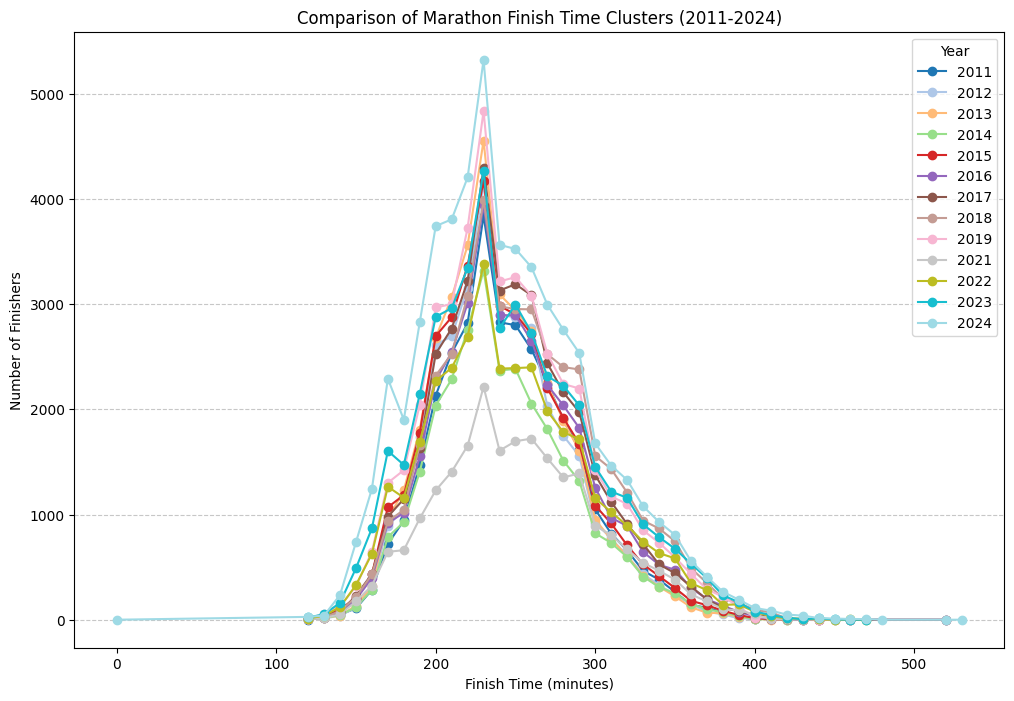

In [ ]:
#Time cluster finish time
df['netto_minutes'] = df['netto'].dt.total_seconds() / 60

bin_size = 10

years = sorted(df['year'].unique())
results = []

colors = cm.get_cmap('tab20', len(years))
plt.figure(figsize=(12, 8))

for i, year in enumerate(years):
    yearly_data = df[df['year'] == year]
    yearly_data['time_bin'] = (yearly_data['netto_minutes'] // bin_size) * bin_size
    bin_counts = yearly_data.groupby('time_bin').size().reset_index(name='count')
    bin_counts['year'] = year
    results.append(bin_counts)

    plt.plot(
        bin_counts['time_bin'],
        bin_counts['count'],
        marker='o',
        label=f'{year}',
        color=colors(i)
    )

final_results = pd.concat(results, ignore_index=True)

plt.xlabel('Finish Time (minutes)')
plt.ylabel('Number of Finishers')
plt.title('Comparison of Marathon Finish Time Clusters (2011-2024)')
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
total_finishers_per_year = final_results.groupby('year')['count'].sum().reset_index()
total_finishers_per_year.rename(columns={'count': 'total_count'}, inplace=True)


final_results = final_results.merge(total_finishers_per_year, on='year')

final_results['percentage'] = (final_results['count'] / final_results['total_count']) * 100

In [ ]:
final_results.sort_values(by='percentage', ascending=False, inplace=True)
final_results.head(19)

,time_bin,count,year,total_count,percentage
74,230.0,4554,2013,36472,12.486291
42,230.0,4141,2012,34269,12.083808
11,230.0,3841,2011,32914,11.669806
105,230.0,3319,2014,28945,11.466575
136,230.0,4174,2015,36758,11.355351
271,230.0,4834,2019,43976,10.992359
167,230.0,3940,2016,35991,10.947181
201,230.0,4292,2017,39223,10.942559
375,230.0,4267,2023,43045,9.912882
412,230.0,5322,2024,54155,9.827347


In [ ]:
#Finish time of the fastest person per year
df[df['platz'] == 1].sort_values(by="year")

,id,platz,startnummer,name,nachname,vorname,verein,nation,ak,ak_platz,...,z20,z25,z30,z35,z40,halbmarathon,netto,brutto,year,netto_minutes
32861,34074,1,1,"Makau, Patrick",Makau,Patrick,Kenia,KEN,H,1,...,0 days 00:58:30,0 days 01:13:18,0 days 01:27:38,0 days 01:42:16,0 days 01:57:15,0 days 01:01:44,0 days 02:03:38,0 days 02:03:38,2011,123.633333
67060,35321,1,2,"Mutai, Geoffrey",Mutai,Geoffrey,Kenia,KEN,30,1,...,0 days 00:59:02,0 days 01:13:38,0 days 01:28:11,0 days 01:42:30,0 days 01:57:22,0 days 01:02:12,0 days 02:04:15,0 days 02:04:15,2012,124.250000
70701,3798,1,2,"Kipsang, Wilson",Kipsang,Wilson,Kenia,KEN,30,1,...,0 days 00:58:20,0 days 01:13:13,0 days 01:28:01,0 days 01:42:36,0 days 01:57:12,0 days 01:01:34,0 days 02:03:23,0 days 02:03:23,2013,123.383333
132369,29710,1,2,"Kimetto, Dennis",Kimetto,Dennis,Kenia,KEN,30,1,...,0 days 00:58:36,0 days 01:13:08,0 days 01:27:38,0 days 01:41:47,0 days 01:56:29,0 days 01:01:45,0 days 02:02:57,0 days 02:02:57,2014,122.950000
168505,37053,1,4,"Kipchoge, Eliud",Kipchoge,Eliud,Kenia,KEN,30,1,...,0 days 00:58:39,0 days 01:13:25,0 days 01:28:10,0 days 01:42:33,0 days 01:57:29,0 days 01:01:53,0 days 02:04:00,0 days 02:04:00,2015,124.000000
184054,45825,1,5,"Bekele, Kenenisa",Bekele,Kenenisa,NaN,ETH,30,1,...,0 days 00:58:02,0 days 01:12:47,0 days 01:27:30,0 days 01:42:01,0 days 01:56:55,0 days 01:01:11,0 days 02:03:03,0 days 02:03:03,2016,123.050000
208776,11146,1,2,"Kipchoge, Eliud",Kipchoge,Eliud,Kenia,KEN,30,1,...,0 days 00:58:18,0 days 01:12:50,0 days 01:27:24,0 days 01:42:04,0 days 01:57:08,0 days 01:01:29,0 days 02:03:32,0 days 02:03:32,2017,123.533333
283376,40124,1,1,"Kipchoge, Eliud",Kipchoge,Eliud,Kenia,KEN,30,1,...,0 days 00:57:56,0 days 01:12:24,0 days 01:26:45,0 days 00:00:00,0 days 01:55:32,0 days 01:01:06,0 days 02:01:39,0 days 02:01:39,2018,121.650000
316307,31261,1,2,"Bekele, Kenenisa",Bekele,Kenenisa,Äthiopien,ETH,35,1,...,0 days 00:57:58,0 days 01:12:30,0 days 01:26:55,0 days 01:41:15,0 days 01:55:30,0 days 01:01:05,0 days 02:01:41,0 days 02:01:41,2019,121.683333
329191,2188,1,2,"Adola, Guye",Adola,Guye,Adidas,ETH,30,1,...,0 days 00:57:37,0 days 01:12:41,0 days 01:27:48,0 days 01:43:09,0 days 01:59:08,0 days 01:00:48,0 days 02:05:45,0 days 02:05:45,2021,125.750000


In [ ]:
#Yearly finish time difference of the fastest woman and the 10th fastest woman
years = range(2011, 2025)
yearly_differences_w = {}

df_w = df[df['sex'] == 'W']

for year in years:
    year_data = df_w[df_w['year'] == year]
    top_ten = year_data.sort_values(by='platz')
    
    if len(top_ten) >= 10:
        time_fastest = top_ten.iloc[0]['netto']
        time_ten = top_ten.iloc[9]['netto']
        yearly_differences_w[year] = time_ten - time_fastest
    else:
        yearly_differences_w[year] = 0

yearly_differences_w

{2011: Timedelta('0 days 00:09:39'),
 2012: Timedelta('0 days 00:12:57'),
 2013: Timedelta('0 days 00:17:05'),
 2014: Timedelta('0 days 00:17:47'),
 2015: Timedelta('0 days 00:08:59'),
 2016: Timedelta('0 days 00:18:25'),
 2017: Timedelta('0 days 00:13:01'),
 2018: Timedelta('0 days 00:09:18'),
 2019: Timedelta('0 days 00:11:11'),
 2020: 0,
 2021: Timedelta('0 days 00:10:28'),
 2022: Timedelta('0 days 00:06:44'),
 2023: Timedelta('0 days 00:11:08'),
 2024: Timedelta('0 days 00:06:54')}

In [ ]:
yearly_differences_w = pd.DataFrame.from_dict(yearly_differences_w, orient='index', columns=['difference'])
yearly_differences_w

,difference
2011,0 days 00:09:39
2012,0 days 00:12:57
2013,0 days 00:17:05
2014,0 days 00:17:47
2015,0 days 00:08:59
2016,0 days 00:18:25
2017,0 days 00:13:01
2018,0 days 00:09:18
2019,0 days 00:11:11
2020,0


In [ ]:
yearly_differences_w = yearly_differences_w.reset_index()
yearly_differences_w

,index,difference
0,2011,0 days 00:09:39
1,2012,0 days 00:12:57
2,2013,0 days 00:17:05
3,2014,0 days 00:17:47
4,2015,0 days 00:08:59
5,2016,0 days 00:18:25
6,2017,0 days 00:13:01
7,2018,0 days 00:09:18
8,2019,0 days 00:11:11
9,2020,0


In [ ]:
#Yearly finish time difference of the fastest man and the 10th fastest man

years = range(2011, 2025)
yearly_differences_m = {}

df_m = df[df['sex'] == 'M']

for year in years:
    year_data = df_m[df_m['year'] == year]
    top_ten = year_data.sort_values(by='platz')
    
    if len(top_ten) >= 10:
        time_fastest = top_ten.iloc[0]['netto']
        time_ten = top_ten.iloc[9]['netto']
        yearly_differences_m[year] = time_ten - time_fastest
    else:
        yearly_differences_m[year] = 0

yearly_differences_m

{2011: Timedelta('0 days 00:12:22'),
 2012: Timedelta('0 days 00:07:16'),
 2013: Timedelta('0 days 00:08:54'),
 2014: Timedelta('0 days 00:08:28'),
 2015: Timedelta('0 days 00:07:24'),
 2016: Timedelta('0 days 00:07:19'),
 2017: Timedelta('0 days 00:09:25'),
 2018: Timedelta('0 days 00:11:30'),
 2019: Timedelta('0 days 00:07:58'),
 2020: 0,
 2021: Timedelta('0 days 00:06:40'),
 2022: Timedelta('0 days 00:06:52'),
 2023: Timedelta('0 days 00:02:23'),
 2024: Timedelta('0 days 00:02:37')}

In [ ]:
yearly_differences_m = pd.DataFrame.from_dict(yearly_differences_m, orient='index', columns=['difference'])
yearly_differences_m

,difference
2011,0 days 00:12:22
2012,0 days 00:07:16
2013,0 days 00:08:54
2014,0 days 00:08:28
2015,0 days 00:07:24
2016,0 days 00:07:19
2017,0 days 00:09:25
2018,0 days 00:11:30
2019,0 days 00:07:58
2020,0


In [ ]:
yearly_differences_m = yearly_differences_m.reset_index()

In [ ]:
yearly_differences = pd.merge(yearly_differences_m, yearly_differences_w, how="left", on=["index"])
yearly_differences.rename(columns={'index': 'year', 'difference_x': 'difference_m','difference_y': 'difference_w'}, inplace=True)
yearly_differences

,year,difference_m,difference_w
0,2011,0 days 00:12:22,0 days 00:09:39
1,2012,0 days 00:07:16,0 days 00:12:57
2,2013,0 days 00:08:54,0 days 00:17:05
3,2014,0 days 00:08:28,0 days 00:17:47
4,2015,0 days 00:07:24,0 days 00:08:59
5,2016,0 days 00:07:19,0 days 00:18:25
6,2017,0 days 00:09:25,0 days 00:13:01
7,2018,0 days 00:11:30,0 days 00:09:18
8,2019,0 days 00:07:58,0 days 00:11:11
9,2020,0,0


In [ ]:
weather_time.to_csv('../data/processed/weather_time.csv')

## Age

### Cleaning 

In [ ]:
df['ak'].unique()

array(['40', '45', '30', '60', 'H', '35', '55', '50', '65', '70', '75',
       'JA', '80', nan, 'U20', '85', 'Jug', 'JU20'], dtype=object)

In [ ]:
df[df['ak'].isna()]

,id,platz,startnummer,name,nachname,vorname,verein,nation,ak,ak_platz,...,z20,z25,z30,z35,z40,halbmarathon,netto,brutto,year,netto_minutes
52428,20259,12554,3612,"Adriaansen, Dave",Adriaansen,Dave,NaN,NLD,NaN,0,...,0 days 01:45:20,0 days 02:12:34,0 days 02:40:09,0 days 03:08:30,0 days 03:37:41,0 days 01:51:05,0 days 03:49:46,0 days 04:00:05,2012,229.766667
60031,28086,22822,33294,"Hocke, Michael",Hocke,Michael,DB,DEU,NaN,0,...,0 days 02:02:23,0 days 02:31:45,0 days 03:01:24,0 days 03:31:17,0 days 04:05:00,0 days 02:08:38,0 days 04:21:03,0 days 04:43:22,2012,261.050000
60791,28871,32527,27010,"Steffensen, Bjarne",Steffensen,Bjarne,NaN,DNK,NaN,0,...,0 days 02:19:15,0 days 03:05:13,0 days 03:42:55,0 days 04:21:45,0 days 05:03:33,0 days 02:27:19,0 days 05:22:28,0 days 05:45:36,2012,322.466667
64789,32991,585,15426,"vanKeulen, Louran",van Keulen,Louran,AP-running,NLD,NaN,0,...,0 days 01:20:33,0 days 01:40:50,0 days 02:01:12,0 days 02:21:50,0 days 02:42:56,0 days 01:24:56,0 days 02:52:23,0 days 02:52:31,2012,172.383333
65143,33353,18654,F7913,"Szpakowska, Agnieszka",Szpakowska,Agnieszka,NaN,DEU,NaN,0,...,0 days 01:52:52,0 days 02:22:18,0 days 02:51:53,0 days 03:21:15,0 days 03:51:54,0 days 01:58:59,0 days 04:06:25,0 days 04:23:04,2012,246.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475787,45780,45719,86201,"VERNHES, LAURENT",VERNHES,LAURENT,NaN,FRA,NaN,0,...,0 days 02:00:43,0 days 02:36:28,0 days 03:23:46,0 days 04:03:43,0 days 04:44:55,0 days 02:08:10,0 days 05:03:36,0 days 05:03:37,2024,303.600000
480508,50501,50440,77645,"Radermacher, Louis",Radermacher,Louis,Team Louis Radermacher,GER,NaN,0,...,0 days 02:26:25,0 days 03:07:31,0 days 03:46:25,0 days 04:38:12,0 days 05:20:39,0 days 02:33:55,0 days 05:37:40,0 days 05:47:39,2024,337.666667
481779,51772,51713,61342,"Giannelos, Zacharias",Giannelos,Zacharias,NaN,GRE,NaN,0,...,0 days 02:39:46,0 days 03:25:20,0 days 04:09:04,0 days 04:49:15,0 days 05:33:10,0 days 02:49:25,0 days 05:51:20,0 days 05:56:48,2024,351.333333
483485,53478,53420,21041,"Junsiri, Pakawat",Junsiri,Pakawat,NaN,THA,NaN,0,...,0 days 02:50:32,0 days 03:38:59,0 days 04:28:02,0 days 05:14:23,0 days 06:01:54,0 days 03:00:02,0 days 06:21:31,0 days 06:23:25,2024,381.516667


In [ ]:
df = df[df['ak'].notna()]

In [ ]:
df = df[(df['ak'] != '85') & (df['ak'] != 'Jug') & (df['ak'] != 'JU20') & (df['ak'] != 'JA') & (df['ak'] != 'U20')]
df

,id,platz,startnummer,name,nachname,vorname,verein,nation,ak,ak_platz,...,z20,z25,z30,z35,z40,halbmarathon,netto,brutto,year,netto_minutes
0,163,25505,F3671,"Imane, Meknassi",Imane,Meknassi,NaN,FRA,40,967,...,0 days 02:02:11,0 days 02:35:02,0 days 03:10:02,0 days 00:00:00,0 days 04:24:49,0 days 02:08:42,0 days 04:40:42,0 days 04:51:25,2011,280.700000
1,165,31168,18941,"Mehnert, Heiko",Mehnert,Heiko,Thebobcurtizmovement,DEU,45,4685,...,0 days 02:13:46,0 days 02:52:33,0 days 03:36:21,0 days 04:20:49,0 days 05:07:56,0 days 02:21:08,0 days 05:25:47,0 days 05:50:09,2011,325.783333
2,166,15421,17952,"Lujic, Miroslav",Lujic,Miroslav,NaN,SVN,45,2656,...,0 days 01:56:40,0 days 02:24:31,0 days 02:52:51,0 days 03:21:17,0 days 03:50:26,0 days 02:02:52,0 days 04:01:35,0 days 04:27:39,2011,241.583333
3,167,10092,13238,"Holst Rasmussen, Allan",Holst Rasmussen,Allan,NaN,DNK,30,1249,...,0 days 01:40:45,0 days 02:05:30,0 days 02:32:49,0 days 02:59:53,0 days 03:30:44,0 days 01:45:59,0 days 03:46:46,0 days 03:51:41,2011,226.766667
4,168,6155,8162,"Dölling, Steffen",Dölling,Steffen,SV Rotation Halle e.V.,DEU,30,845,...,0 days 01:41:42,0 days 02:07:11,0 days 02:31:48,0 days 02:56:28,0 days 03:21:12,0 days 01:47:34,0 days 03:31:48,0 days 03:35:11,2011,211.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484229,54222,54164,51331,"Astra, Doddy",Astra,Doddy,NaN,INA,60,1865,...,0 days 03:06:24,0 days 04:08:28,0 days 05:10:34,0 days 06:48:49,0 days 07:36:13,0 days 03:18:03,0 days 07:58:09,0 days 08:16:45,2024,478.150000
484230,54223,54165,63243,"Hart, Thomas",Hart,Thomas,Richmond Rockets,USA,75,77,...,0 days 02:59:16,0 days 04:03:24,0 days 05:08:29,0 days 06:19:38,0 days 07:33:42,0 days 03:11:39,0 days 07:58:55,0 days 08:10:30,2024,478.916667
484231,54224,54166,777,"Descombes, Michel",Descombes,Michel,Superman-Michel,FRA,80,18,...,0 days 00:00:00,0 days 04:49:12,0 days 05:49:08,0 days 06:09:23,0 days 00:00:00,0 days 00:00:00,0 days 08:09:01,0 days 08:28:36,2024,489.016667
484232,54225,54167,85148,"Trenkmann, Richard",Trenkmann,Richard,NaN,USA,80,19,...,0 days 03:53:10,0 days 04:55:32,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 04:05:59,0 days 08:47:03,0 days 09:03:49,2024,527.050000


### General

In [ ]:
#Amount of participants by age

age = df.groupby("year")['ak'].value_counts().unstack().reset_index()
if 2020 not in age['year'].values:
    year = {col: 0 for col in age.columns}
    year['year'] = 2020 
    new_row = pd.DataFrame([year])
    
    age = pd.concat([age, new_row], ignore_index=True)


age = age.drop_duplicates(subset='year', keep='first')


age = age.sort_values(by='year').reset_index(drop=True)
age

,year,30,35,40,45,50,55,60,65,70,75,80,H
0,2011,4004,4772,6555,6270,4270,2006,1012,388,161,29,3,3357
1,2012,4181,5122,6632,6526,4563,2153,990,409,156,21,4,3390
2,2013,4416,5221,6945,6998,5040,2440,1139,450,170,38,8,3503
3,2014,3600,4199,5440,5425,3977,1987,942,371,159,43,5,2725
4,2015,4588,5363,6583,6734,5182,2603,1208,423,163,69,5,3757
5,2016,4610,5499,6057,6477,5209,2658,1169,436,162,55,12,3567
6,2017,5221,5970,6575,6819,5593,3013,1312,527,171,63,9,3871
7,2018,5454,6244,6849,6867,5687,3102,1533,543,162,57,16,4050
8,2019,6158,6970,7520,7112,5965,3413,1623,603,201,63,14,4253
9,2020,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Age distribution in percentage

age_percentage = (df.groupby("year")['ak'].value_counts(normalize=True)*100).unstack().reset_index()

if 2020 not in age_percentage['year'].values:
    year = {col: 0 for col in age_percentage.columns}
    year['year'] = 2020 
    new_row = pd.DataFrame([year])
    
    age_percentage = pd.concat([age_percentage, new_row], ignore_index=True)

age_percentage = age_percentage.drop_duplicates(subset='year', keep='first')

age_percentage = age_percentage.sort_values(by='year').reset_index(drop=True)
age_percentage

,year,30,35,40,45,50,55,60,65,70,75,80,H
0,2011,12.197277,14.536814,19.968319,19.100131,13.007585,6.110823,3.082828,1.181954,0.490450,0.088342,0.009139,10.226338
1,2012,12.244121,14.999854,19.421911,19.111489,13.362814,6.305093,2.899230,1.197763,0.456848,0.061499,0.011714,9.927666
2,2013,12.142543,14.356027,19.096458,19.242191,13.858337,6.709195,3.131874,1.237352,0.467444,0.104487,0.021997,9.632094
3,2014,12.468396,14.542999,18.841132,18.789180,13.774114,6.881862,3.262564,1.284937,0.550687,0.148928,0.017317,9.437883
4,2015,12.508861,14.621844,17.948089,18.359780,14.128360,7.096897,3.293527,1.153280,0.444408,0.188124,0.013632,10.243198
5,2016,12.837292,15.312857,16.866698,18.036256,14.505305,7.401632,3.255270,1.214113,0.451115,0.153156,0.033416,9.932890
6,2017,13.337932,15.251380,16.796955,17.420294,14.288269,7.697221,3.351727,1.346311,0.436849,0.160944,0.022992,9.889127
7,2018,13.445420,15.392959,16.884430,16.928804,14.019821,7.647175,3.779213,1.338625,0.399369,0.140519,0.039444,9.984222
8,2019,14.028933,15.878802,17.131792,16.202301,13.589247,7.775373,3.697460,1.373733,0.457911,0.143524,0.031894,9.689031
9,2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
(age_percentage[age_percentage['year'] == 2024].iloc[0]['30'])+(age_percentage[age_percentage['year'] == 2024].iloc[0]['H'])

np.float64(26.694569968145792)

In [ ]:
(age_percentage[age_percentage['year'] == 2011].iloc[0]['30'])+(age_percentage[age_percentage['year'] == 2011].iloc[0]['H'])

np.float64(22.42361470740549)

In [ ]:
age_percentage['30-39'] =  age_percentage['30'] + age_percentage['35']
age_percentage['40-49'] =  age_percentage['40'] + age_percentage['45']
age_percentage['50-59'] =  age_percentage['50'] + age_percentage['55']
age_percentage['60-69'] =  age_percentage['60'] + age_percentage['65']
age_percentage['70-79'] =  age_percentage['70'] + age_percentage['75']
age_percentage.rename(columns={'H': '20-29'}, inplace=True)

In [ ]:
age_percentage = age_percentage[['year','20-29','30-39','40-49','50-59','60-69','70-79', '80']]
age_percentage

In [ ]:
age_percentage.to_csv('../data/processed/age_percentage.csv')

### Germany

In [ ]:
df['nation'].unique()

array(['FRA', 'DEU', 'SVN', 'DNK', 'GBR', 'NOR', 'CHL', 'NLD', 'CAN',
       'ITA', 'BRA', 'ESP', 'SWE', 'USA', 'FIN', 'JPN', 'TUR', 'CZE',
       'POL', 'BEL', 'VEN', 'LUX', 'CHE', 'PRT', 'AUT', 'IRL', 'ARG',
       'HUN', 'NZL', 'MEX', 'COL', 'IDN', 'EST', 'IND', 'RUS', 'ISL',
       'AUS', 'CRI', 'ECU', 'ISR', 'SRB', 'PHL', 'ZAF', 'KOR', 'LCA',
       'CHN', 'GRC', 'HKG', 'PRI', 'SVK', 'LVA', 'PRY', 'PER', 'ZWE',
       'IRN', 'GTM', 'UGA', 'SGP', 'URY', 'LBY', 'MKD', 'BIH', 'TWN',
       'KEN', 'ROU', 'BHS', 'DZA', 'FJI', 'UKR', 'MAR', 'FRO', 'BGR',
       'HRV', 'MYS', 'LIE', 'DOM', 'LBN', 'VNM', 'HTI', 'COD', 'CMR',
       'MLT', 'GGY', 'TCD', 'GIN', 'MCO', 'CXR', 'GEO', 'MDA', 'CYP',
       'JAM', 'LTU', 'EGY', 'LKA', 'BGD', 'ALB', 'TON', 'IMN', 'CIV',
       'UMI', 'SLV', 'AND', 'MTQ', 'BOL', 'BRB', 'KAZ', 'BLR', 'ETH',
       'UZB', 'GRL', 'NGA', nan, 'VGB', 'REU', 'MUS', 'MNE', 'ABW', 'MNG',
       'NPL', 'ANT', 'HND', 'CUB', 'PAN', 'SMR', 'TGO', 'KGZ', 'SEN',
       'PAK', '

In [ ]:
df_GER = df[(df['nation'] == 'DEU') | (df['nation'] == 'GER')]
df_GER

,id,platz,startnummer,name,nachname,vorname,verein,nation,ak,ak_platz,...,z20,z25,z30,z35,z40,halbmarathon,netto,brutto,year,netto_minutes
1,165,31168,18941,"Mehnert, Heiko",Mehnert,Heiko,Thebobcurtizmovement,DEU,45,4685,...,0 days 02:13:46,0 days 02:52:33,0 days 03:36:21,0 days 04:20:49,0 days 05:07:56,0 days 02:21:08,0 days 05:25:47,0 days 05:50:09,2011,325.783333
4,168,6155,8162,"Dölling, Steffen",Dölling,Steffen,SV Rotation Halle e.V.,DEU,30,845,...,0 days 01:41:42,0 days 02:07:11,0 days 02:31:48,0 days 02:56:28,0 days 03:21:12,0 days 01:47:34,0 days 03:31:48,0 days 03:35:11,2011,211.800000
9,173,14924,29222,"Weigel, Sascha",Weigel,Sascha,NaN,DEU,30,1746,...,0 days 01:57:03,0 days 02:26:08,0 days 02:54:16,0 days 03:21:25,0 days 03:48:50,0 days 02:03:04,0 days 03:59:58,0 days 04:15:38,2011,239.966667
11,175,15432,25613,"Seyffert, Kurt",Seyffert,Kurt,TV Altötting,DEU,55,589,...,0 days 01:50:10,0 days 02:18:00,0 days 02:46:18,0 days 03:16:02,0 days 03:48:36,0 days 01:56:14,0 days 04:01:38,0 days 04:19:37,2011,241.633333
12,176,27824,F5573,"Müller, Diana",Müller,Diana,Bördeschnecken Hildesheim,DEU,30,784,...,0 days 02:11:17,0 days 02:47:05,0 days 03:25:23,0 days 04:01:42,0 days 04:37:30,0 days 02:18:48,0 days 04:53:19,0 days 05:14:38,2011,293.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484219,54212,54154,68280,"Kruczek, justus",Kruczek,justus,Tri-Finisher,GER,35,5662,...,0 days 03:09:00,0 days 04:08:40,0 days 05:15:56,0 days 06:16:57,0 days 07:20:26,0 days 03:22:23,0 days 07:46:04,0 days 07:52:27,2024,466.066667
484220,54213,54155,16818,"Eitz, Kai",Eitz,Kai,NaN,GER,35,5663,...,0 days 03:17:46,0 days 04:15:46,0 days 05:15:33,0 days 06:15:16,0 days 07:19:30,0 days 03:29:50,0 days 07:46:10,0 days 07:50:55,2024,466.166667
484227,54220,54162,4006,"Görs, Kai",Görs,Kai,Laufen ist mein Leben,GER,45,4955,...,0 days 03:18:35,0 days 04:19:50,0 days 05:21:54,0 days 06:21:55,0 days 07:25:59,0 days 03:31:05,0 days 07:55:22,0 days 07:58:49,2024,475.366667
484228,54221,54163,85206,"Tritsch, Matthias",Tritsch,Matthias,NaN,GER,40,5690,...,0 days 02:37:30,0 days 04:40:38,0 days 05:42:44,0 days 06:36:22,0 days 07:32:18,0 days 02:47:42,0 days 07:56:47,0 days 08:07:12,2024,476.783333


In [ ]:
# Amount of german participants by age

age_GER = df_GER.groupby('year')['ak'].value_counts().unstack().reset_index()

if 2020 not in age_GER['year'].values:
    year = {col: 0 for col in age_GER.columns}
    year['year'] = 2020 
    new_row = pd.DataFrame([year])
    
    age_GER = pd.concat([age_GER, new_row], ignore_index=True)

age_GER = age_GER.drop_duplicates(subset='year', keep='first')

age_GER = age_GER.sort_values(by='year').reset_index(drop=True)
age_GER

,year,30,35,40,45,50,55,60,65,70,75,80,H
0,2011,1270.0,1416.0,2604.0,2892.0,1988.0,911.0,447.0,186.0,108.0,22.0,NaN,1203.0
1,2012,1399.0,1477.0,2399.0,3019.0,2111.0,1000.0,420.0,184.0,105.0,15.0,2.0,1295.0
2,2013,1527.0,1600.0,2489.0,3289.0,2393.0,1144.0,542.0,192.0,112.0,25.0,3.0,1433.0
3,2014,1225.0,1223.0,1762.0,2425.0,1907.0,949.0,440.0,163.0,88.0,30.0,4.0,1041.0
4,2015,1825.0,1840.0,2248.0,3210.0,2689.0,1306.0,608.0,227.0,93.0,54.0,4.0,1682.0
5,2016,1868.0,1976.0,2018.0,2836.0,2720.0,1368.0,585.0,220.0,82.0,42.0,7.0,1570.0
6,2017,1983.0,2044.0,2104.0,2786.0,2791.0,1464.0,629.0,258.0,86.0,42.0,6.0,1654.0
7,2018,1803.0,1908.0,1966.0,2433.0,2616.0,1462.0,673.0,243.0,80.0,40.0,12.0,1439.0
8,2019,1903.0,1957.0,1959.0,2129.0,2439.0,1455.0,642.0,265.0,93.0,38.0,11.0,1516.0
9,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Age distribution of german participants by age in percentage

age_GER_per = (df_GER.groupby('year')['ak'].value_counts(normalize=True)*100).unstack().reset_index()

if 2020 not in age_GER_per['year'].values:
    year = {col: 0 for col in age_GER_per.columns}
    year['year'] = 2020 
    new_row = pd.DataFrame([year])
    
    age_GER_per = pd.concat([age_GER_per, new_row], ignore_index=True)

age_GER_per = age_GER_per.drop_duplicates(subset='year', keep='first')

age_GER_per = age_GER_per.sort_values(by='year').reset_index(drop=True)

age_GER_per

,year,30,35,40,45,50,55,60,65,70,75,80,H
0,2011,9.734038,10.853070,19.958611,22.166015,15.237219,6.982448,3.426075,1.425615,0.827777,0.168621,NaN,9.220510
1,2012,10.420080,11.001043,17.868315,22.486221,15.723224,7.448235,3.128259,1.370475,0.782065,0.111724,0.014896,9.645464
2,2013,10.353244,10.848193,16.875720,22.299817,16.224829,7.756458,3.674825,1.301783,0.759374,0.169503,0.020340,9.715913
3,2014,10.882118,10.864351,15.652483,21.542152,16.940570,8.430310,3.908679,1.447988,0.781736,0.266501,0.035533,9.247579
4,2015,11.560877,11.655898,14.240466,20.334474,17.034081,8.273153,3.851514,1.437983,0.589130,0.342075,0.025339,10.655011
5,2016,12.215538,12.921789,13.196443,18.545645,17.787078,8.945854,3.825530,1.438661,0.536228,0.274653,0.045776,10.266806
6,2017,12.513409,12.898340,13.276961,17.580615,17.612166,9.238342,3.969206,1.628068,0.542689,0.265034,0.037862,10.437307
7,2018,12.286201,13.001704,13.396934,16.579216,17.826235,9.962521,4.586031,1.655877,0.545145,0.272572,0.081772,9.805792
8,2019,13.208857,13.583675,13.597557,14.777539,16.929270,10.099257,4.456167,1.839384,0.645520,0.263761,0.076352,10.522663
9,2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
(age_GER_per[age_GER_per['year'] == 2024].iloc[0]['30'])+(age_GER_per[age_GER_per['year'] == 2024].iloc[0]['H'])

np.float64(29.381388976709875)

In [ ]:
(age_GER_per[age_GER_per['year'] == 2011].iloc[0]['30'])+(age_GER_per[age_GER_per['year'] == 2011].iloc[0]['H'])

np.float64(18.954548938453286)

## Gender

In [427]:
# Gender distribution per year 

gender = (df.groupby("year")['sex'].value_counts(normalize=True)*100).unstack().reset_index()

if 2020 not in gender['year'].values:
    year = {col: 0 for col in gender.columns}
    year['year'] = 2020 
    new_row = pd.DataFrame([year])
    
    gender = pd.concat([gender, new_row], ignore_index=True)

gender = gender.drop_duplicates(subset='year', keep='first')

gender = gender.sort_values(by='year').reset_index(drop=True)
gender

,year,M,W,X
0,2011,77.576385,22.423615,NaN
1,2012,77.046300,22.953700,NaN
2,2013,75.481192,24.518808,NaN
3,2014,76.642538,23.357462,NaN
4,2015,75.767490,24.232510,NaN
5,2016,74.375540,25.624460,NaN
6,2017,71.773452,28.226548,NaN
7,2018,69.808204,30.191796,NaN
8,2019,69.896344,30.103656,NaN
9,2020,0.000000,0.000000,0.000000


In [428]:
#Gender distribution under 30 per year

gender_H = (df[df['ak'] == 'H'].groupby("year")['sex'].value_counts(normalize=True)*100).unstack().reset_index()

if 2020 not in gender_H['year'].values:
    year = {col: 0 for col in gender_H.columns}
    year['year'] = 2020 
    new_row = pd.DataFrame([year])
    
    gender_H = pd.concat([gender_H, new_row], ignore_index=True)

gender_H = gender_H.drop_duplicates(subset='year', keep='first')

gender_H = gender_H.sort_values(by='year').reset_index(drop=True)
gender_H

,year,M,W,X
0,2011,71.045576,28.954424,NaN
1,2012,69.498525,30.501475,NaN
2,2013,69.226377,30.773623,NaN
3,2014,65.944954,34.055046,NaN
4,2015,65.823796,34.176204,NaN
5,2016,64.760303,35.239697,NaN
6,2017,60.526996,39.473004,NaN
7,2018,58.098765,41.901235,NaN
8,2019,59.581472,40.418528,NaN
9,2020,0.000000,0.000000,0.000000


In [429]:
merged_gender = pd.merge(gender, gender_H, how="left", on=["year"])
merged_gender.rename(columns={'M_x': 'M', 'W_x': 'W','X_x': 'X', 'M_y': 'M_H','W_y': 'W_H', 'X_y': 'X_H'}, inplace=True)
merged_gender

,year,M,W,X,M_H,W_H,X_H
0,2011,77.576385,22.423615,NaN,71.045576,28.954424,NaN
1,2012,77.046300,22.953700,NaN,69.498525,30.501475,NaN
2,2013,75.481192,24.518808,NaN,69.226377,30.773623,NaN
3,2014,76.642538,23.357462,NaN,65.944954,34.055046,NaN
4,2015,75.767490,24.232510,NaN,65.823796,34.176204,NaN
5,2016,74.375540,25.624460,NaN,64.760303,35.239697,NaN
6,2017,71.773452,28.226548,NaN,60.526996,39.473004,NaN
7,2018,69.808204,30.191796,NaN,58.098765,41.901235,NaN
8,2019,69.896344,30.103656,NaN,59.581472,40.418528,NaN
9,2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [430]:
# German gender distribution
gender_GER = (df_GER.groupby("year")['sex'].value_counts(normalize=True)*100).unstack().reset_index()

if 2020 not in gender_GER['year'].values:
    year = {col: 0 for col in gender_GER.columns}
    year['year'] = 2020 
    new_row = pd.DataFrame([year])
    
    gender_GER = pd.concat([gender_H, new_row], ignore_index=True)

gender_GER = gender_GER.drop_duplicates(subset='year', keep='first')

gender_GER = gender_GER.sort_values(by='year').reset_index(drop=True)
gender_GER

,year,M,W,X
0,2011,71.045576,28.954424,NaN
1,2012,69.498525,30.501475,NaN
2,2013,69.226377,30.773623,NaN
3,2014,65.944954,34.055046,NaN
4,2015,65.823796,34.176204,NaN
5,2016,64.760303,35.239697,NaN
6,2017,60.526996,39.473004,NaN
7,2018,58.098765,41.901235,NaN
8,2019,59.581472,40.418528,NaN
9,2020,0.000000,0.000000,0.000000


In [431]:
# German gender distribution under 30
gender_GER_H = (df_GER[df_GER['ak'] == 'H'].groupby("year")['sex'].value_counts(normalize=True)*100).unstack().reset_index()

if 2020 not in gender_GER_H['year'].values:
    year = {col: 0 for col in gender_GER_H.columns}
    year['year'] = 2020 
    new_row = pd.DataFrame([year])
    
    gender_GER_H = pd.concat([gender_GER_H, new_row], ignore_index=True)

gender_GER_H = gender_GER_H.drop_duplicates(subset='year', keep='first')

gender_GER_H = gender_GER_H.sort_values(by='year').reset_index(drop=True)
gender_GER_H

,year,M,W,X
0,2011,77.223608,22.776392,NaN
1,2012,76.525097,23.474903,NaN
2,2013,72.086532,27.913468,NaN
3,2014,69.452450,30.547550,NaN
4,2015,68.965517,31.034483,NaN
5,2016,67.133758,32.866242,NaN
6,2017,65.598549,34.401451,NaN
7,2018,62.404448,37.595552,NaN
8,2019,64.775726,35.224274,NaN
9,2020,0.000000,0.000000,0.000000


In [432]:
german_merged = pd.merge(gender_GER, gender_GER_H, how="left", on=["year"])
german_merged.rename(columns={'M_x': 'M', 'W_x': 'W','X_x': 'X', 'M_y': 'M_H','W_y': 'W_H', 'X_y': 'X_H'}, inplace=True)
german_merged

,year,M,W,X,M_H,W_H,X_H
0,2011,71.045576,28.954424,NaN,77.223608,22.776392,NaN
1,2012,69.498525,30.501475,NaN,76.525097,23.474903,NaN
2,2013,69.226377,30.773623,NaN,72.086532,27.913468,NaN
3,2014,65.944954,34.055046,NaN,69.452450,30.547550,NaN
4,2015,65.823796,34.176204,NaN,68.965517,31.034483,NaN
5,2016,64.760303,35.239697,NaN,67.133758,32.866242,NaN
6,2017,60.526996,39.473004,NaN,65.598549,34.401451,NaN
7,2018,58.098765,41.901235,NaN,62.404448,37.595552,NaN
8,2019,59.581472,40.418528,NaN,64.775726,35.224274,NaN
9,2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [433]:
# German women distribution per age

women = (df_GER[df_GER['sex'] == 'W'].groupby("year")['ak'].value_counts(normalize=True)*100).unstack().reset_index()



if 2020 not in women['year'].values:
    year = {col: 0 for col in women.columns}
    year['year'] = 2020 
    new_row = pd.DataFrame([year])
    
    women = pd.concat([women, new_row], ignore_index=True)

women = women.drop_duplicates(subset='year', keep='first')

women = women.sort_values(by='year').reset_index(drop=True)
women

,year,30,35,40,45,50,55,60,65,70,75,80,H
0,2011,11.242830,11.510516,21.185468,21.720841,14.837476,5.965583,2.026769,0.650096,0.344168,0.038241,NaN,10.478011
1,2012,11.542572,11.542572,18.311364,22.443890,15.781974,6.305664,1.923762,0.926256,0.391877,NaN,NaN,10.830068
2,2013,10.806958,10.749929,18.135158,23.210721,15.397776,6.301682,2.822926,0.798403,0.313658,0.057029,NaN,11.405760
3,2014,12.908853,11.600523,15.787178,21.107719,15.351068,6.279983,2.049717,0.697776,0.261666,0.087222,NaN,13.868295
4,2015,13.490173,11.792734,14.085765,18.642049,15.753425,6.968434,2.650387,0.774270,0.148898,0.148898,NaN,15.544967
5,2016,14.885496,12.830299,13.211979,17.762772,15.296536,7.017029,2.613036,0.939518,0.146800,0.146800,NaN,15.149736
6,2017,13.987932,13.878223,13.247394,17.388919,14.893033,6.993966,2.825014,0.713110,0.329128,0.137137,NaN,15.606144
7,2018,13.606972,12.679224,14.225471,16.446444,15.293787,8.068597,3.092494,0.871521,0.309249,0.140568,0.056227,15.209446
8,2019,14.532374,13.294964,15.280576,14.733813,15.539568,7.165468,2.618705,1.122302,0.230216,0.086331,0.028777,15.366906
9,2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [434]:
# German men distribution per age

men = (df_GER[df_GER['sex'] == 'M'].groupby("year")['ak'].value_counts(normalize=True)*100).unstack().reset_index()



if 2020 not in men['year'].values:
    year = {col: 0 for col in men.columns}
    year['year'] = 2020 
    new_row = pd.DataFrame([year])
    
    men = pd.concat([men, new_row], ignore_index=True)

men = men.drop_duplicates(subset='year', keep='first')

men = men.sort_values(by='year').reset_index(drop=True)
men

,year,30,35,40,45,50,55,60,65,70,75,80,H
0,2011,9.355828,10.688267,19.651074,22.277607,15.337423,7.237347,3.776840,1.620015,0.949003,0.201304,NaN,8.905291
1,2012,10.123364,10.857896,17.751201,22.497410,15.707694,7.750259,3.446652,1.487899,0.885206,0.141256,0.018834,9.332329
2,2013,10.211706,10.878847,16.482832,22.015656,16.482832,8.210283,3.940580,1.458815,0.898417,0.204590,0.026686,9.188756
3,2014,10.363677,10.676037,15.618028,21.653280,17.347166,8.980366,4.384203,1.639893,0.914770,0.312361,0.044623,8.065596
4,2015,11.039588,11.618925,14.282266,20.791761,17.380109,8.625684,4.176054,1.617316,0.708079,0.394271,0.032185,9.333762
5,2016,11.450446,12.948006,13.191991,18.769981,18.500757,9.498570,4.172977,1.581693,0.647821,0.311291,0.058893,8.867575
6,2017,12.072781,12.605524,13.285796,17.637899,18.424719,9.909024,4.311122,1.901483,0.606508,0.303254,0.049176,8.892714
7,2018,11.863645,13.104875,13.131858,16.621695,18.636445,10.568448,5.063860,1.906818,0.620615,0.314805,0.089944,8.076992
8,2019,12.788145,13.675448,13.062569,14.791438,17.371021,11.031833,5.040249,2.067325,0.777534,0.320161,0.091475,8.982803
9,2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [435]:
##gender german all age classes
gender_GER_ak = (df_GER.groupby(["year", "ak"])['sex'].value_counts(normalize=True)*100).unstack().reset_index()
gender_GER_ak

sex,year,ak,M,W,X
0,2011,30,76.850394,23.149606,NaN
1,2011,35,78.742938,21.257062,NaN
2,2011,40,78.725038,21.274962,NaN
3,2011,45,80.359613,19.640387,NaN
4,2011,50,80.482897,19.517103,NaN
...,...,...,...,...,...
150,2024,65,80.719794,19.280206,NaN
151,2024,70,82.781457,17.218543,NaN
152,2024,75,86.538462,13.461538,NaN
153,2024,80,82.352941,17.647059,NaN
